In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from shapely.geometry import Polygon
import geopandas as gpd
import os

In [3]:
tiff_path = "../data/2024-09-21-00_00_2024-09-21-23_59_Landsat_8-9_L2_NDVI.tiff" #Replace with your actual file path

try:
    with rasterio.open(tiff_path) as src:
        ndvi_array = src.read(1)  # Read the first band (usually NDVI)
        meta = src.meta
except rasterio.errors.RasterioIOError:
    print(f"Error: Could not open the file at '{tiff_path}'. Please check the file path.")
    exit()

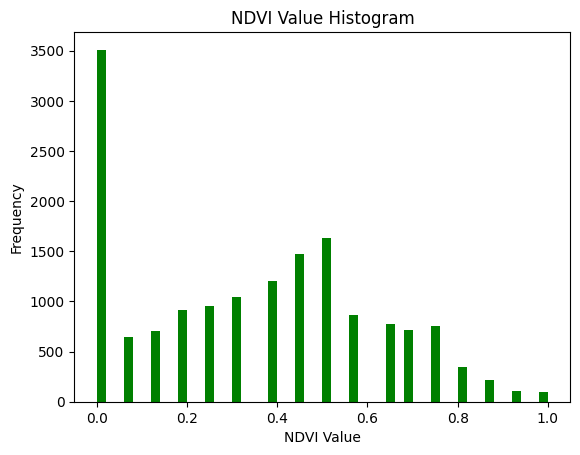

In [4]:
plt.hist(ndvi_array.flatten(), bins=50, color='green')
plt.title('NDVI Value Histogram')
plt.xlabel('NDVI Value')
plt.ylabel('Frequency')
plt.show()

threshold = 0.2 #Experiment with this value

In [5]:
 mask = ndvi_array >= threshold

In [6]:
from rasterio import features

# Vectorize the mask to find shapes of polygons
polygons = []
for geom, value in features.shapes(mask.astype('int16'), transform=meta['transform']):
        if value == 1: # We only want the polygons where our mask was 1
            polygons.append(Polygon(geom['coordinates'][0])) #Create the polygon and append it
#Create a GeoPandas GeoDataFrame to hold the polygon vector data
gdf = gpd.GeoDataFrame({'geometry': polygons}, crs=meta['crs'])

In [9]:
save_path = "../output_data/green_areas.geojson"  # Update with your desired path and file type
gdf.to_file(save_path, driver='GeoJSON')

#Optional save as shapefile
# save_shapefile_path = "path/to/save/green_areas.shp"
# gdf.to_file(save_shapefile_path, driver='ESRI Shapefile')

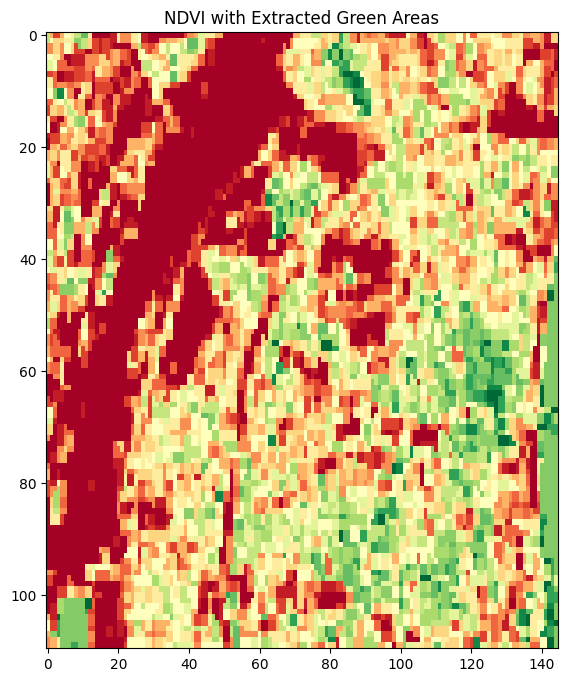

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
show(ndvi_array, ax=ax, cmap='RdYlGn')  #Display the original NDVI image
gdf.plot(ax=ax, facecolor = 'lightgreen', edgecolor = 'green', alpha=0.5) #Overlay the found polygons
ax.set_title('NDVI with Extracted Green Areas')
plt.show()

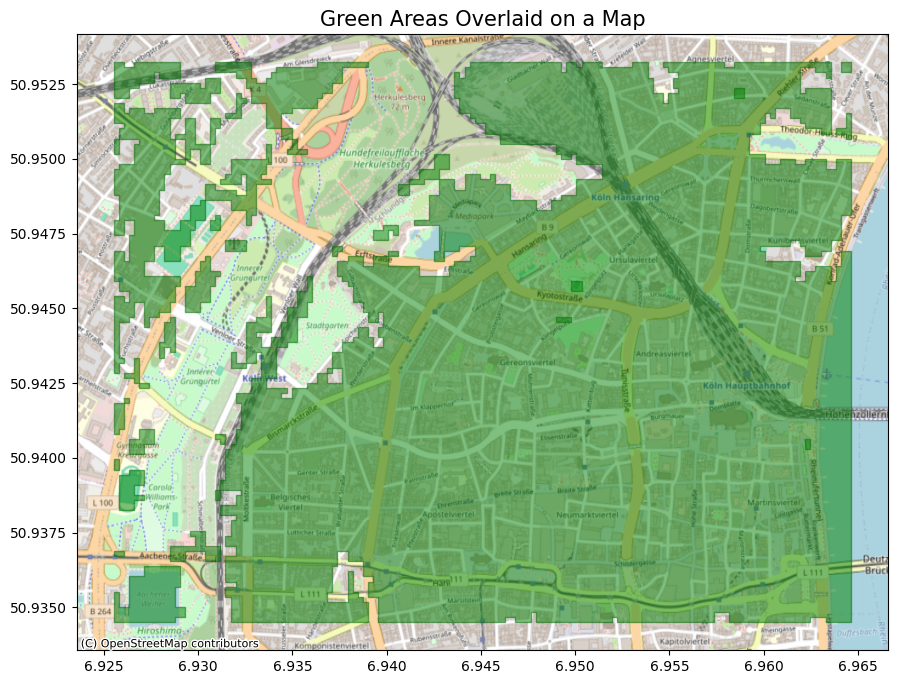

In [14]:
import contextily as ctx
import matplotlib.pyplot as plt

# Plot the extracted green areas
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, facecolor='green', edgecolor='darkgreen', alpha=0.5)  # Green areas

# Add a basemap (e.g., OpenStreetMap)
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)  # Can also use other providers

# Add labels
ax.set_title("Green Areas Overlaid on a Map", fontdict={'fontsize': 15})
plt.show()

In [15]:
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.Esri.WorldImagery)

<Figure size 640x480 with 0 Axes>

In [16]:
import folium
import geopandas as gpd

# Convert GeoDataFrame to GeoJSON
green_areas_geojson = gdf.to_crs(epsg=4326).to_json()  # Convert to WGS84 (lat/lon)

# Create a folium map
m = folium.Map(location=[latitude, longitude], zoom_start=12)  # Replace with your city's center coordinates

# Add green areas as a GeoJSON overlay
folium.GeoJson(
    green_areas_geojson,
    name="Green Areas",
    style_function=lambda x: {
        'fillColor': 'green',
        'color': 'darkgreen',
        'weight': 0.5,
        'fillOpacity': 0.5,
    },
).add_to(m)

# Add a layer control
folium.LayerControl().add_to(m)

# Save or display the map
m.save("green_areas_map.html")  # Save to an HTML file
m  # Display in Jupyter Notebook or Python script

NameError: name 'latitude' is not defined